![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Basic Image Classification with TensorFlow

**Import TensorFlow**

In [21]:
import tensorflow
from matplotlib import pyplot as plt

print('Using TensorFlow version', tensorflow.__version__)

Using TensorFlow version 2.14.0


# Task 2: The Dataset
### Import MNIST

In [15]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [17]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Plot an Image Example

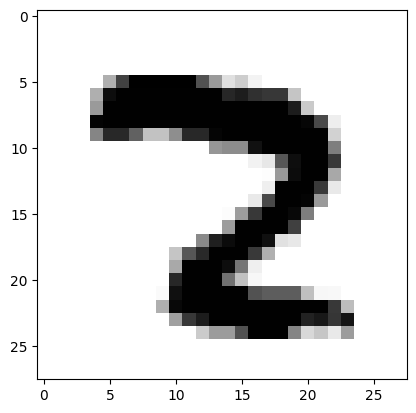

In [25]:
plt.imshow(x_train[28], cmap='binary')
plt.show()

### Display Labels

In [27]:
y_train[28]

2

In [28]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [29]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


### Validated Shapes

In [31]:
print("y_train_encoded: ", y_train_encoded.shape)
print("y_test_encoded: ", y_test_encoded.shape)

y_train_encoded:  (60000, 10)
y_test_encoded:  (10000, 10)


### Display Encoded Labels

In [32]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [34]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print("x_train_reshaped: ", x_train_reshaped.shape)
print("x_test_reshaped: ", x_test_reshaped.shape)

x_train_reshaped:  (60000, 784)
x_test_reshaped:  (10000, 784)


### Display Pixel Values

In [37]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [46]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [48]:
print(set(x_train_norm[1000]))

{0.7850776264218882, 1.4342010744372422, 2.8088154349403447, 2.8215433456857437, 2.7706317027041476, -0.34770642991863165, -0.38589016215482896, 2.5542572200323628, 2.5288013985415647, 2.681536327486354, 1.7142151108360224, 2.668808416740955, 2.4015222910875735, 1.7651267538176187, -0.14405985799224608, 2.7960875241949457, 2.7451758812133495, 0.02140298169794222, 0.2250495536243278, -0.18224359022844336, 1.5742080926366322, 2.5033455770507667, 0.3014170180967224, 1.281466145492453, -0.4240738943910262, 0.4286961255507134, 0.1486820891519332, -0.33497851917323257, 0.3141449288421215, -0.29679478693703526, 1.0905474843114664, 2.706992148977152, 2.3633385588513764, 2.1215082546887936, -0.13133194724684696, -0.16951567948304427, 2.566985130777762, 2.2233315406519862, 0.03413089244334132, 0.6832543404586954, 2.325154826615179, 0.7087101619494935, -0.27133896544623703, 1.052363752075269, 0.7341659834402917, 0.8105334479126863, 0.772349715676489, -0.41134598364562713, 0.912356733875879, 0.950

# Task 6: Creating a Model
### Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(128, activation='relu', input_shape=(784, )),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

# Task 7: Training the Model

### Training the Model

### Evaluating the Model

# Task 8: Predictions

### Predictions on Test Set

### Plotting the Results